Silhouette random=0: 0.11362027575179431
Silhouette random=1: 0.11403554201377074
Silhouette random=2: 0.11362027575179431
Purity_0: 0.7671957671957672
Purity_1: 0.7632275132275133
Purity_2: 0.7671957671957672
components:  31


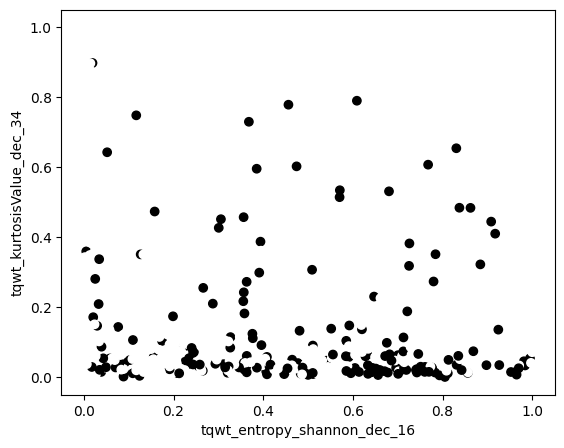

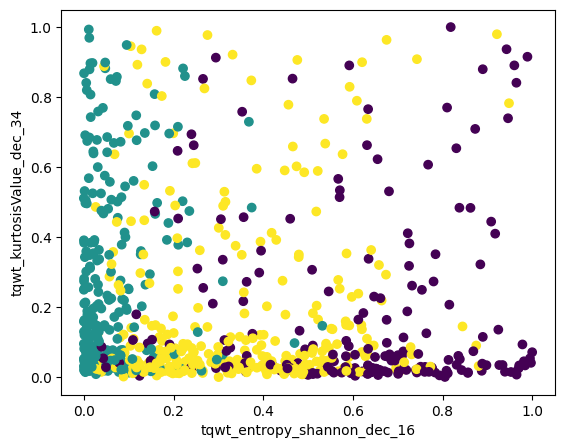

In [10]:
from select import select
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from numpy import array
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn import metrics
from sklearn import datasets, metrics, cluster, mixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
X = df.drop('class', axis=1)
#normalization

trs = MinMaxScaler()
X_norm = trs.fit_transform(X)

# parameterize clustering
kmeans_algo_0 = cluster.KMeans(n_clusters=3, random_state=0)
kmeans_algo_1 = cluster.KMeans(n_clusters=3, random_state=1)
kmeans_algo_2 = cluster.KMeans(n_clusters=3, random_state=2)

# learn the model
kmeans_model_0 = kmeans_algo_0.fit(X_norm)
kmeans_model_1 = kmeans_algo_1.fit(X_norm)
kmeans_model_2 = kmeans_algo_2.fit(X_norm)

y_pred_0 = kmeans_model_0.labels_.tolist()
y_pred_1 = kmeans_model_1.labels_.tolist()
y_pred_2 = kmeans_model_2.labels_.tolist()

y_true = df['class'].str.decode('utf-8')
[int(x) for x in y_true]

print("Silhouette random=0:",metrics.silhouette_score(X_norm, y_pred_0, metric='euclidean'))
print("Silhouette random=1:",metrics.silhouette_score(X_norm, y_pred_1, metric='euclidean'))
print("Silhouette random=2:",metrics.silhouette_score(X_norm, y_pred_2, metric='euclidean'))

def purity_score(y_true, y_pred):
    # compute contingency/confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

print("Purity_0:",purity_score(y_true, y_pred_0))
print("Purity_1:",purity_score(y_true, y_pred_1))
print("Purity_2:",purity_score(y_true, y_pred_2))

#variance



thresholder = VarianceThreshold(threshold=.068)
X_highest_variance = thresholder.fit_transform(X_norm)


line = X_norm[0]
for num in range(len(line)):
    if line[num] == X_highest_variance[0][0]:
        best_feature1 = list(X.columns)[num]
    if line[num] == X_highest_variance[0][1]:
        best_feature2 = list(X.columns)[num]

plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.scatter(X_highest_variance[:,0], X_highest_variance[:,1], c=y_true)
plt.xlabel(best_feature1)
plt.ylabel(best_feature2)

plt.figure(figsize=(14, 5))
plt.subplot(122)
plt.scatter(X_highest_variance[:,0], X_highest_variance[:,1], c=y_pred_0)
plt.xlabel(best_feature1)
plt.ylabel(best_feature2)

k = 1
while(True):
    pca = PCA(n_components=k, svd_solver='full')
    pca.fit(X_norm)
    sum = 0
    for num in pca.explained_variance_ratio_:
        sum += num
    if sum >= 0.8:
        break
    k += 1
print("components: ", k)